## Ejercicio 4 — Imagen = Matriz

### Cargar imagen

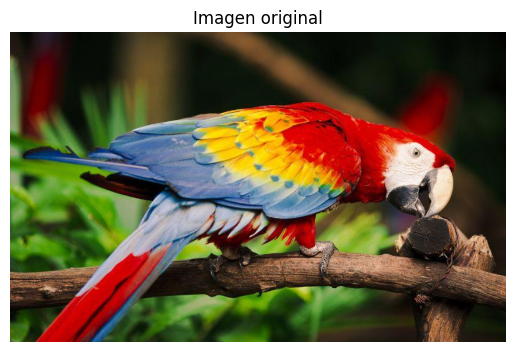

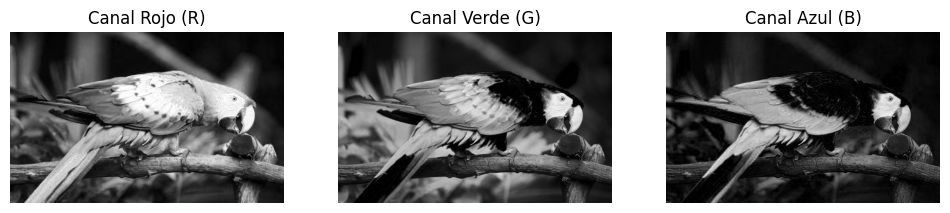

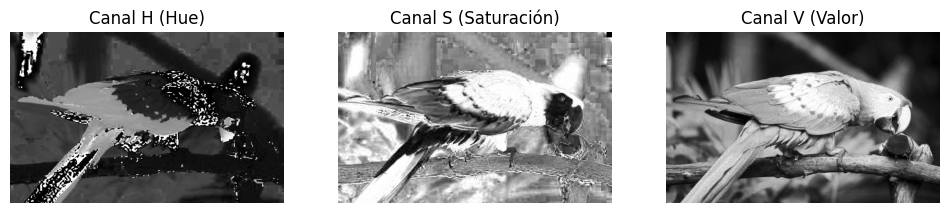

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Paso 1: Cargar imagen ===
img = cv2.imread('/content/Guacamaya.jpg')

# Verificar carga
if img is None:
    print("Error: no se pudo cargar la imagen.")
else:
    # Convertir de BGR (OpenCV) a RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title('Imagen original')
    plt.axis('off')
    plt.show()

# === Paso 2: Separar canales RGB ===
b, g, r = cv2.split(img)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(r, cmap='gray')
plt.title('Canal Rojo (R)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title('Canal Verde (G)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(b, cmap='gray')
plt.title('Canal Azul (B)')
plt.axis('off')
plt.show()

# === Paso 3: Convertir a HSV y separar canales ===
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title('Canal H (Hue)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title('Canal S (Saturación)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')
plt.title('Canal V (Valor)')
plt.axis('off')
plt.show()



### Edición de regiones por slicing


Basicamente es moverla como una matriz

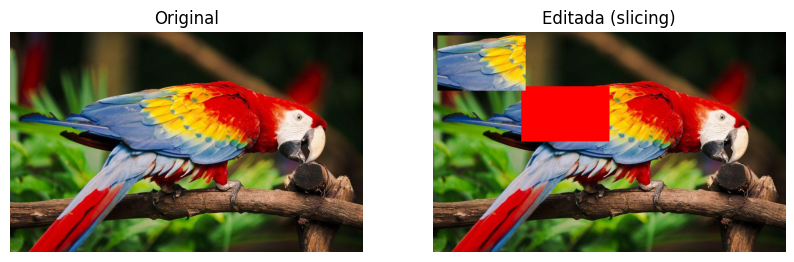

In [5]:
# Creamos una copia de la imagen original
editada = img.copy()

# Definimos una región (por ejemplo, un cuadrado en el centro)
alto, ancho = editada.shape[:2]
x1, y1 = ancho//4, alto//4
x2, y2 = x1 + ancho//4, y1 + alto//4

# Cambiamos el color de esa región a rojo puro
editada[y1:y2, x1:x2] = [0, 0, 255]  # En formato BGR

# Copiamos esa región y la pegamos en otra zona
region = img[y1:y2, x1:x2]
editada[10:10+(y2-y1), 10:10+(x2-x1)] = region  # Copiar arriba a la izquierda

# Mostrar comparación antes y después
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
editada_rgb = cv2.cvtColor(editada, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(editada_rgb)
plt.title('Editada (slicing)')
plt.axis('off')
plt.show()


### Histograma de intensidades

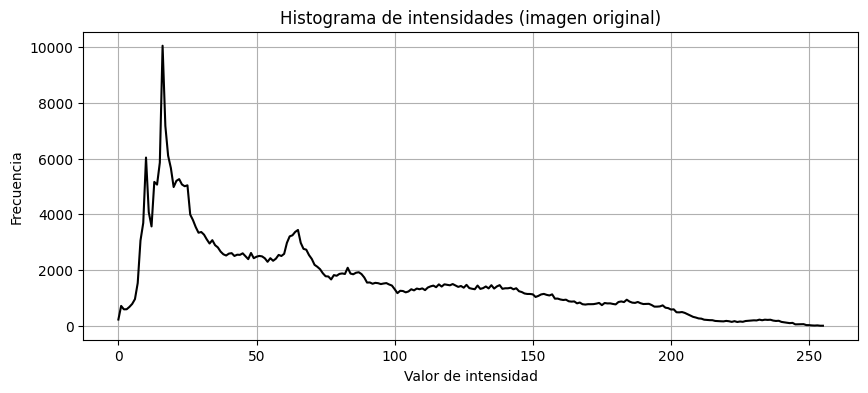

In [6]:
# Convertir imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular histograma (256 bins, rango de 0 a 256)
hist = cv2.calcHist([gris], [0], None, [256], [0,256])

# Mostrar histograma
plt.figure(figsize=(10,4))
plt.plot(hist, color='black')
plt.title('Histograma de intensidades (imagen original)')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El histograma dice que hay mas zonas sombreadas en la imagen

### Brillo y contraste

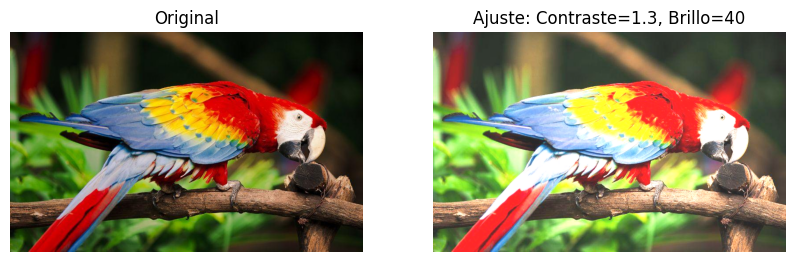

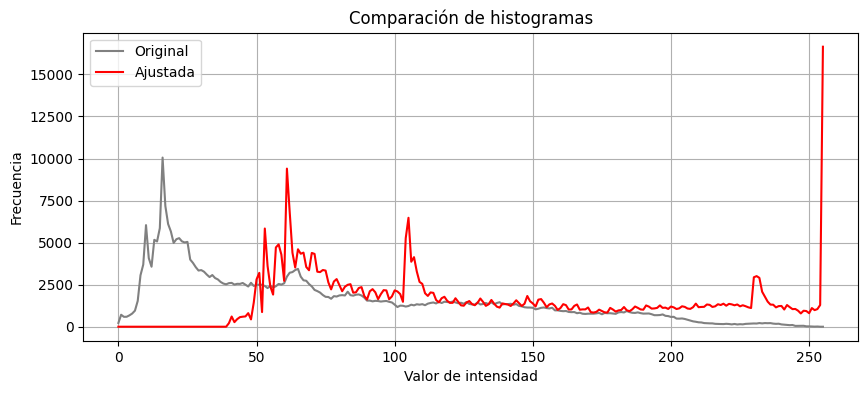

In [9]:
# Parámetros
alpha = 1.3  # Contraste (1.0 = sin cambio, >1 = más contraste)
beta = 40    # Brillo (0 = sin cambio, >0 = más brillante)

# Aplicar el ajuste
ajustada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Convertir a RGB para mostrar correctamente
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ajustada_rgb = cv2.cvtColor(ajustada, cv2.COLOR_BGR2RGB)

# Mostrar comparación
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ajustada_rgb)
plt.title(f'Ajuste: Contraste={alpha}, Brillo={beta}')
plt.axis('off')
plt.show()

# Mostrar histogramas comparativos
gris_original = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gris_ajustada = cv2.cvtColor(ajustada, cv2.COLOR_BGR2GRAY)

hist_orig = cv2.calcHist([gris_original], [0], None, [256], [0,256])
hist_adj = cv2.calcHist([gris_ajustada], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))
plt.plot(hist_orig, color='gray', label='Original')
plt.plot(hist_adj, color='red', label='Ajustada')
plt.title('Comparación de histogramas')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()
